In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import ast

In [2]:
methods_path = "2_methods_log.ndjson"
datasets_path = "1_datasets_log.ndjson"

In [ ]:
selected_methods = ["63","64","65","66","67","69","70"]
# selected_datasets = ["364","365","366","367","368","369","370","371","372","373","374","375","376","377","378",
#                      "822","823","824","825","826","827","828","829","830","831","832","833","834","835",
#                      "836","837","838","839","840","841","842","843","844","845"]
selected_datasets = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20",
                     "21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39"]
selected_metrics = ["1","2","3"]

data = pd.read_csv("main_result.txt", sep="\t", header=0, dtype={'ID_method': str, 'ID_dataset': str, 'ID_metric': str})
data = data[data['ID_method'].isin(selected_methods)]
data = data[data['ID_dataset'].isin(selected_datasets)]
data = data[data['ID_metric'].isin(selected_metrics)]
print(data.shape)
print(data.head())

# Parsing methods_log
methods_data = pd.read_json(methods_path, lines=True, dtype={'ID_method': str})
methods_data = methods_data[methods_data['ID_method'].isin(selected_methods)]
methods_mapping = {method_id: method_name.replace("clear_v5/run_","").replace(".R","")
                   for method_id, method_name in zip(methods_data['ID_method'], methods_data['method'])}
print(methods_mapping)
methods_mapping['66'] = 'CLEAR_tnormal_stat'
methods_mapping['69'] = 'GSEA'
methods_mapping['70'] = 'ORA'

(819, 4)
      ID_dataset ID_method ID_metric   
38622        369        67        30  \
38629        365        70        30   
38630        366        67        30   
38631        365        67        30   
38632        367        67        30   

                                                   value  
38622  {'n_common': 36, 'n_common_selected': 27, 'n_t...  
38629  {'n_common': 282, 'n_common_selected': 282, 'n...  
38630  {'n_common': 25, 'n_common_selected': 19, 'n_t...  
38631  {'n_common': 282, 'n_common_selected': 272, 'n...  
38632  {'n_common': 81, 'n_common_selected': 32, 'n_t...  
{'63': 'CLEAR_tnormal', '64': 'CLEAR_beta', '65': 'CLEAR_gamma', '66': 'CLEAR_stat_tnormal_stat', '67': 'MGSA', '69': 'GSEA_stat', '70': 'hypergeom'}


In [4]:
print(data['ID_metric'].value_counts())

ID_metric
30    273
32    273
31    273
Name: count, dtype: int64


In [ ]:
# Parsing microarray datasets into diseases
import re
def extract_disease_code_from_dataset(datasetid_file):
    id_to_code = {}
    # id_to_name = {}
    line_re = re.compile(r'^(\S+)\s+(.*?)\s*\[([^\]]+)\]\s*$')  # group1=id, group2=full name, group3=code
    with open(datasetid_file, "r", encoding="utf-8") as fh:
        for raw in fh:
            line = raw.strip()
            if not line or line.startswith('#'):
                continue
            m = line_re.match(line)
            if m:
                gid, name, code = m.group(1), m.group(2).strip(), m.group(3).strip()
                id_to_code[gid] = f'{code}'
                # id_to_name[gid] = name
            else:
                # fallback: try to find last [CODE] and first token
                if '[' in line and ']' in line:
                    try:
                        code = line[line.rfind('[')+1:line.rfind(']')].strip()
                        gid = line.split(None, 1)[0]
                        # disease name is everything between first whitespace and the bracket
                        name = line[len(gid):line.rfind('[')].strip()
                        id_to_code[gid] = f'{code}'
                        # id_to_name[gid] = name
                    except Exception:
                        # skip malformed line
                        continue
    return id_to_code
microarray_mapping = extract_disease_code_from_dataset("GseId2Disease.txt")


# Parsing datasets_log
datasets_data = pd.read_json(datasets_path, lines=True, dtype={'ID_dataset': str})
datasets_data = datasets_data[datasets_data['ID_dataset'].isin(selected_datasets)]
datasets_mapping = {}
for dataset_id, dataset_name in zip(datasets_data['ID_dataset'], datasets_data['gene_list']):
    if 'tcga_data' in dataset_name:
        datasets_mapping[dataset_id] = dataset_name.replace("tcga_data/","").replace(".tsv","")
    if 'kegg_de_results_baseMean' in dataset_name:
        dataset_symbol = dataset_name.replace("kegg_de_results_baseMean/","").replace("_de_limma.tsv","")
        datasets_mapping[dataset_id] = f'{microarray_mapping.get(dataset_symbol, dataset_symbol)} ({dataset_symbol})'
print(datasets_mapping)

{'364': 'BLCA', '365': 'BRCA', '366': 'COAD', '367': 'HNSC', '368': 'KICH', '369': 'KIRC', '370': 'KIRP', '371': 'LIHC', '372': 'LUAD', '373': 'LUSC', '374': 'PRAD', '375': 'READ', '376': 'STAD', '377': 'THCA', '378': 'UCEC', '822': 'ALZ (GSE1297)', '823': 'KIRC (GSE14762)', '824': 'PAAD (GSE15471)', '825': 'PAAD (GSE16515)', '826': 'LUAD (GSE18842)', '827': 'LUAD (GSE19188)', '828': 'GBM (GSE19728)', '829': 'PARK (GSE20153)', '830': 'PARK (GSE20291)', '831': 'LGG (GSE21354)', '832': 'THCA (GSE3467)', '833': 'DCM (GSE3585)', '834': 'THCA (GSE3678)', '835': 'CRC (GSE4107)', '836': 'ALZ (GSE5281_EC)', '837': 'ALZ (GSE5281_HIP)', '838': 'ALZ (GSE5281_VCX)', '839': 'PRAD (GSE6956AA)', '840': 'PRAD (GSE6956C)', '841': 'KIRC (GSE781)', '842': 'CRC (GSE8671)', '843': 'HUNT (GSE8762)', '844': 'CRC (GSE9348)', '845': 'LAML (GSE9476)'}


In [6]:
import json
def safe_eval(x):
    if isinstance(x, dict):  # Already a dict
        return x
    try:
        # Replace nan/inf before parsing
        x_clean = x.replace('nan', 'null').replace('inf', 'null').replace('-inf', 'null')
        return json.loads(x_clean.replace("'", '"'))  # Convert single to double quotes
    except:
        return ast.literal_eval(x)

In [7]:
# Term size ties (ID_metric 32) # ID_metric 28 has bug in GSEA result
tst = data[data['ID_metric'] == '32']
tst.loc[:, 'value'] = tst.loc[:, 'value'].apply(lambda x: ast.literal_eval(x)['score_termsize'])
print(tst.head())
print(tst["ID_method"].value_counts())

# Overlap ties (ID_metric 31)
overlap = data[data['ID_metric'] == '31'] # ID_metric 29 has bug in GSEA result
overlap.loc[:, 'value'] = overlap.loc[:, 'value'].apply(lambda x: ast.literal_eval(x)['score_overlap'])
print(overlap.head())
print(overlap["ID_method"].value_counts())

# Phenorelevance metrics (ID_metric 30)
pheno = data[data['ID_metric'] == '30'].copy()
pheno.loc[:, 'value'] = pheno.loc[:, 'value'].apply(lambda x: safe_eval(x))
metric_columns = ['n_common', 'n_common_selected', 'n_total', 'pheno_pr_auc', 'pheno_prevalence']
pheno[metric_columns] = pheno['value'].apply(lambda x: pd.Series({k: x.get(k, None) for k in metric_columns}))
# Calculate normalized_pr_auc
pheno['normalized_pr_auc'] = pheno.apply(
    lambda row: row['pheno_pr_auc'] / (row['n_common'] / row['n_total'])
    if pd.notna(row['pheno_prevalence']) and row['pheno_prevalence'] != 0 
    else None, 
    axis=1
)
pheno = pheno.drop(columns=['value'])
print(pheno.head())
print(pheno["ID_method"].value_counts())

      ID_dataset ID_method ID_metric   value
39324        824        67        32    67.4
39326        822        67        32  155.55
39330        822        70        32  126.35
39340        827        67        32   123.5
39343        824        70        32   189.2
ID_method
67    39
70    39
69    39
63    39
64    39
65    39
66    39
Name: count, dtype: int64
      ID_dataset ID_method ID_metric   value
39325        824        67        31  0.0491
39327        822        67        31  0.1032
39329        822        70        31  0.7452
39339        823        67        31  0.0825
39341        827        67        31  0.0533
ID_method
67    39
70    39
69    39
63    39
64    39
65    39
66    39
Name: count, dtype: int64
      ID_dataset ID_method ID_metric  n_common  n_common_selected  n_total   
38622        369        67        30      36.0               27.0   3290.0  \
38629        365        70        30     282.0              282.0   3334.0   
38630        366        67  

In [125]:
# Function to get positive/negative gene set counts
import pickle as cp
import numpy as np
def tabulate_distribution_positives_negatives(annotation_file, gene_file, groundtruth_df):
    annotation_df = pd.read_csv(annotation_file,sep="\t",header=0)
    annotation_df.columns=["term","T"]
    annotation_df['T'] = annotation_df['T'].apply(lambda x: ast.literal_eval(x))
    
    # Methods don't see small or large terms, so filter them out
    lower_cutoff, upper_cutoff = 20, 500
    annotation_df = annotation_df[(annotation_df['T'].apply(len) >= int(lower_cutoff)) &
                           (annotation_df['T'].apply(len) <= int(upper_cutoff))]
    # Terms in annotation_file and results file are combined, terms of groundtruth pickle file are not
    valid_terms = set(groundtruth_df['GO_ID']) if 'GO_ID' in groundtruth_df.columns else set(groundtruth_df['Pathway'])
    def find_matching_term(x):
        terms = x.split(" & ")
        matching_terms = [t for t in terms if t in valid_terms]
        return matching_terms[0] if matching_terms else terms[0]
    annotation_df["matched_term"] = annotation_df["term"].apply(find_matching_term)
    # Get positive genes from groundtruth_df (either 'Pathway' or 'GO_ID' column)
    positive_gt = set()
    count_gt_genesets = 0
    for idx, row in groundtruth_df.iterrows():
        if 'Pathway' in groundtruth_df.columns:
            term = row['Pathway']
            type = 'MsigDB'
        elif 'GO_ID' in groundtruth_df.columns:
            term = row['GO_ID']
            type = 'GO'
        genes = annotation_df[annotation_df['matched_term'] == term]['T']
        if not genes.empty:
            positive_gt.update(genes.values[0])
            count_gt_genesets += 1
        
    gene_df = pd.read_csv(gene_file, sep="\t", header=0)
    cancer_id = gene_file.split("/")[1].replace(".tsv","")
    if 'external_gene_name' in gene_df.columns:
        positive_pvalues = np.array([gene_df[gene_df['external_gene_name'] == gene]['pvalue'].values[0] for gene in positive_gt])
        positive_stats = np.array([gene_df[gene_df['external_gene_name'] == gene]['stat'].values[0] for gene in positive_gt])
    elif 'GeneSymbol' in gene_df.columns:
        positive_pvalues = np.array([gene_df[gene_df['GeneSymbol'] == gene]['pvalue'].values[0] for gene in positive_gt])
        positive_stats = np.array([gene_df[gene_df['GeneSymbol'] == gene]['stat'].values[0] for gene in positive_gt])
    if 'external_gene_name' in gene_df.columns:
        negative_pvalues = np.array([gene_df[gene_df['external_gene_name'] == gene]['pvalue'].values[0] for gene in gene_df['external_gene_name'] if gene not in positive_gt])
        negative_stats = np.array([gene_df[gene_df['external_gene_name'] == gene]['stat'].values[0] for gene in gene_df['external_gene_name'] if gene not in positive_gt])
    elif 'GeneSymbol' in gene_df.columns:
        negative_pvalues = np.array([gene_df[gene_df['GeneSymbol'] == gene]['pvalue'].values[0] for gene in gene_df['GeneSymbol'] if gene not in positive_gt])
        negative_stats = np.array([gene_df[gene_df['GeneSymbol'] == gene]['stat'].values[0] for gene in gene_df['GeneSymbol'] if gene not in positive_gt])
    return (len(positive_gt), len(negative_pvalues), count_gt_genesets, len(annotation_df)), (positive_pvalues, negative_pvalues, positive_stats, negative_stats)
       
def extract_phenotype_rankings(pickle_file_path, cancer_id):
    with open(pickle_file_path, 'rb') as f:
        data_dict = cp.load(f)
    if cancer_id in data_dict.keys():
        phenotype_df = data_dict[cancer_id]
        phenotype_df.columns = ['GO_ID','GO_name','REL_SCORE','MATCHED_GENES','TOTAL_GENES']
        return phenotype_df
    else:
        print("Cancer ID not found in the phenotype relevance file")
        return None

In [ ]:
with open("clear_pos_neg_summary_tcga_go.tsv", "w") as out_f:
    out_f.write("Cancer_Type\tNum_Positive_Genes\tNum_Negative_Genes\tNum_Pheno_Relevant_Genesets\tNum_Genesets\n")
    for dataset_id, gene_list in zip(datasets_data['ID_dataset'], datasets_data['gene_list']):
        cancer_name = datasets_mapping[dataset_id].split(" ")[0]  # Remove (microarray) if present
        groundtruth_df = extract_phenotype_rankings("GO_BP.cp", cancer_name)
        annotation_file = f"saved_data/save_{dataset_id}_0to100000_annotations.tsv"
        if 'kegg_de_results_baseMean' in gene_list:
            display_name = f'{cancer_name} ({gene_list.replace("kegg_de_results_baseMean/","").replace("_de_limma.tsv","")})'
        else:
            display_name = cancer_name
        if groundtruth_df is not None:
            (count_table, values) = tabulate_distribution_positives_negatives(annotation_file, gene_list, groundtruth_df)
            num_pos, num_neg, num_gt_sets, num_all_sets = count_table
            out_f.write(f"{display_name}\t{num_pos}\t{num_neg}\t{num_gt_sets}\t{num_all_sets}\n")

In [8]:
color_dict = {
    "63": "#1f77b4",
    "64": "#073b9bff",
    "65": "#0a8e9cff",
    "66": "#d62728",
    "67": "#9467bd",
    "68": "#505050ff",
    "69": "#000000ff",
    "70": "#026305ff"
} 

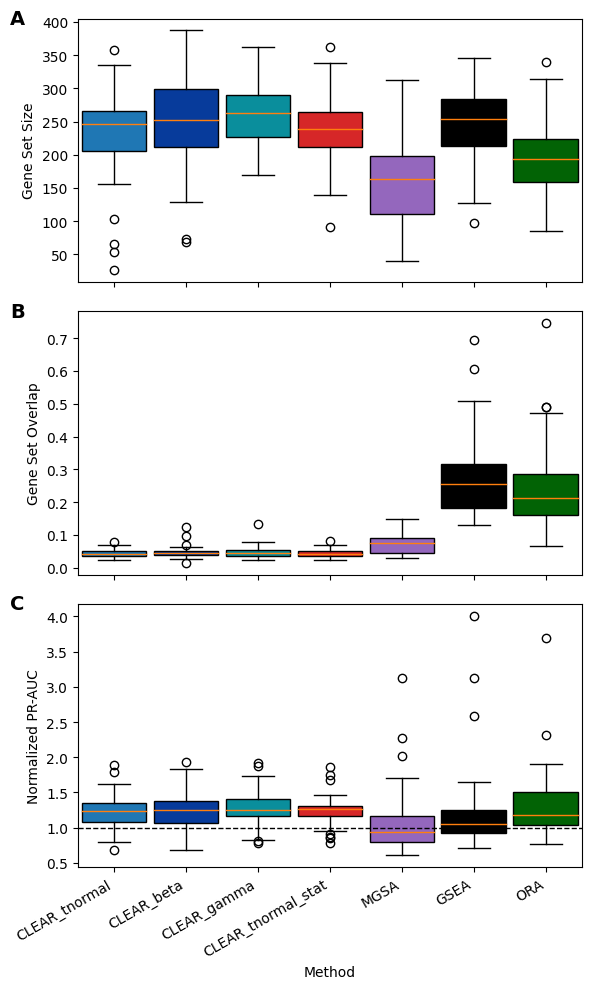

In [9]:
# Plot term size ties and overlap ties as subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 10))

# Gene Set Size Ties Plot
for method_id, group in tst.groupby('ID_method'):
    boxp=axs[0].boxplot(group['value'], positions=[list(methods_mapping.keys()).index(method_id)], widths=0.9,
                   patch_artist=True)
    patch = boxp["boxes"][0]
    patch.set_facecolor(color_dict[method_id])
axs[0].set_xlabel('')
axs[0].set_ylabel('Gene Set Size')
axs[0].set_xticklabels([])
axs[0].text(-0.12, 1, 'A', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes, 
            fontsize=14, fontweight='bold')
# Gene Set Overlap Ties Plot
for method_id, group in overlap.groupby('ID_method'):
    boxp = axs[1].boxplot(group['value'], positions=[list(methods_mapping.keys()).index(method_id)], widths=0.9,
                    patch_artist=True)
    patch = boxp["boxes"][0]
    patch.set_facecolor(color_dict[method_id])
axs[1].set_ylabel('Gene Set Overlap')
axs[1].set_xticks(range(len(methods_mapping)))
axs[1].set_xticklabels([])
axs[1].text(-0.12, 1, 'B', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes, 
            fontsize=14, fontweight='bold')

# Phenorelevance Normalized PR AUC Plot
for method_id, group in pheno.groupby('ID_method'):
    boxp = axs[2].boxplot(group['normalized_pr_auc'], positions=[list(methods_mapping.keys()).index(method_id)], widths=0.9,
                    patch_artist=True)
    patch = boxp["boxes"][0]
    patch.set_facecolor(color_dict[method_id])
axs[2].axhline(y=1, color='black', linestyle='--', linewidth=1)
axs[2].set_xlabel('Method')
axs[2].set_ylabel('Normalized PR-AUC')
axs[2].set_xticks(range(len(methods_mapping)))
axs[2].set_xticklabels([methods_mapping[mid] for mid in methods_mapping.keys()], rotation=30, ha='right')
axs[2].text(-0.12, 1, 'C', horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes, 
            fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("plots_clear_pub/clear_boxplot_termsize_overlap_aucpr.png", dpi=300)
plt.show()


In [ ]:
# P-values across methods for Phenotype relevance PR-AUC
# Using Friedman test with pheno_pr_auc as response variable, blocking on ID_dataset, grouped by ID_method
import scipy.stats as stats
pheno2 = pheno.sort_values(by=['ID_dataset','ID_method']).copy()
pheno_friedman = [
    group['normalized_pr_auc'].values for method_id, group in pheno2.groupby('ID_method')
]
pheno_friedman.append([1.0] * len(pheno2['ID_dataset'].unique()))  # Add baseline method with normalized PR-AUC = 1.0
friedman_stat, friedman_p = stats.friedmanchisquare(*pheno_friedman)
print(f"Friedman test statistic: {friedman_stat}, p-value: {friedman_p}")

import scikit_posthocs as sp
import numpy as np

In [ ]:
# Post-hoc Nemenyi test
df_posthoc = sp.posthoc_nemenyi_friedman(np.array(pheno_friedman).T)
df_posthoc.index = [methods_mapping[mid] for mid in list(pheno2['ID_method'].unique())] + ['baseline']
df_posthoc.columns = [methods_mapping[mid] for mid in list(pheno2['ID_method'].unique())] + ['baseline']
df_posthoc

In [33]:
df_posthoc = df_posthoc.round(6)
df_posthoc.to_csv("plots_clear_pub/clear_phenorelevance_prauc_posthoc_nemenyi.tsv", sep="\t")

In [23]:
# Post-hoc Wilcoxon signed-rank test for pairwise comparisons between methods (stronger than Nemenyi)
wilcoxon_posthoc = sp.posthoc_wilcoxon(np.array(pheno_friedman),p_adjust='holm')
wilcoxon_posthoc.index = [methods_mapping[mid] for mid in list(pheno2['ID_method'].unique())] + ['baseline']
wilcoxon_posthoc.columns = [methods_mapping[mid] for mid in list(pheno2['ID_method'].unique())] + ['baseline']
wilcoxon_posthoc 

,CLEAR_tnormal,CLEAR_beta,CLEAR_gamma,CLEAR_tnormal_stat,MGSA,GSEA,ORA,baseline
CLEAR_tnormal,1.000000,0.901387,0.799650,1.000000e+00,0.094388,0.501542,1.000000,9.099858e-06
CLEAR_beta,0.901387,1.000000,1.000000,1.000000e+00,0.052194,0.228563,1.000000,6.763476e-06
CLEAR_gamma,0.799650,1.000000,1.000000,1.000000e+00,0.044456,0.147443,1.000000,1.452852e-06
CLEAR_tnormal_stat,1.000000,1.000000,1.000000,1.000000e+00,0.130045,0.223533,1.000000,8.858042e-07
MGSA,0.094388,0.052194,0.044456,1.300455e-01,1.000000,0.537998,0.000980,1.000000e+00
GSEA,0.501542,0.228563,0.147443,2.235333e-01,0.537998,1.000000,0.537998,5.030269e-01
ORA,1.000000,1.000000,1.000000,1.000000e+00,0.000980,0.537998,1.000000,9.795277e-04
baseline,0.000009,0.000007,0.000001,8.858042e-07,1.000000,0.503027,0.000980,1.000000e+00


In [79]:
wilcoxon_posthoc = wilcoxon_posthoc.round(6)
wilcoxon_posthoc.to_csv("plots_clear_pub/clear_phenorelevance_prauc_posthoc_wilcoxon.tsv", sep="\t")

ID_method         63        64        65        66        67        69   
ID_dataset                                                               
365         0.103523  0.105762  0.109777  0.109561  0.099494  0.118355  \
844         0.089254  0.088890  0.090234  0.091558  0.054370  0.067546   
842         0.091858  0.090155  0.089587  0.090037  0.056155  0.073580   
835         0.078214  0.086847  0.084617  0.089886  0.070433  0.081142   
378         0.069206  0.072825  0.072884  0.072113  0.079070  0.070403   

ID_method         70  
ID_dataset            
365         0.125766  
844         0.082979  
842         0.078858  
835         0.085032  
378         0.093155  


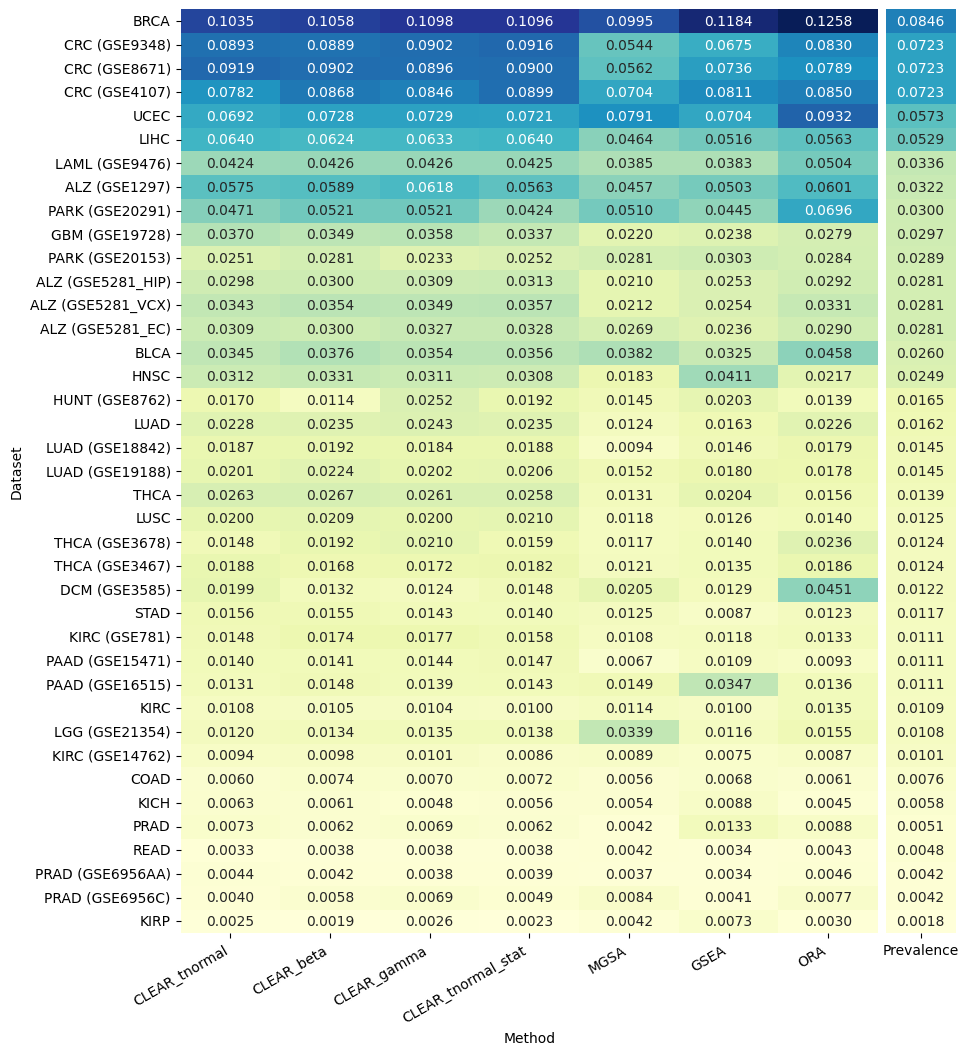

In [13]:
# Heatmap of all datasets as rows and methods as columns
# Sort datasets by average pheno_pr_auc across methods
# Add a column for pheno_prevalence
avg_pheno = pheno.groupby('ID_dataset')['pheno_prevalence'].mean().sort_values(ascending=False)
# avg_pheno_method = pheno.groupby('ID_method')['pheno_pr_auc'].mean().sort_values(ascending=False)
# selected_methods = avg_pheno_method.index.tolist()
selected_datasets = avg_pheno.index.tolist()
heatmap_data = pheno.pivot(index='ID_dataset', columns='ID_method', values='pheno_pr_auc')
heatmap_data = heatmap_data.reindex(index=selected_datasets, columns=selected_methods)
print(heatmap_data.head())
heatmap_data.index = [datasets_mapping[ds_id] for ds_id in heatmap_data.index]
heatmap_data.columns = [methods_mapping[method_id] for method_id in heatmap_data.columns]

prevalence_data = pheno.groupby('ID_dataset')['pheno_prevalence'].first()
prevalence_data = prevalence_data.reindex(index=selected_datasets)
prevalence_data.index = [datasets_mapping[ds_id] for ds_id in prevalence_data.index]

vmin = heatmap_data.min().min()
vmax = heatmap_data.max().max()
import seaborn as sns
# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 12), 
                                gridspec_kw={'width_ratios': [8, 0.8], 'wspace': 0.02})

# Main heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGnBu", cbar=False, ax=ax1,
            vmin=vmin, vmax=vmax)
ax1.set_xlabel('Method')
ax1.set_ylabel('Dataset')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')
# Prevalence column
prevalence_df = prevalence_data.to_frame(name='Prevalence')
sns.heatmap(prevalence_df, annot=True, fmt=".4f", cmap="YlGnBu", cbar=False, ax=ax2, 
            vmin=vmin, vmax=vmax, yticklabels=False)
ax2.set_xlabel('')
ax2.set_ylabel('')

# plt.tight_layout()
plt.savefig("plots_clear_pub/clear_heatmap_aucpr.png", dpi=300, bbox_inches='tight')
plt.show()

In [101]:
import pickle as cp
phenotype_df = extract_phenotype_rankings("GO_BP.cp", "BRCA")
print(phenotype_df.GO_ID.to_list()[:200])

['GO:0008284', 'GO:0048010', 'GO:0043066', 'GO:0001934', 'GO:0007173', 'GO:0048015', 'GO:0048011', 'GO:0006468', 'GO:0042493', 'GO:0007265', 'GO:0038095', 'GO:0008285', 'GO:0008543', 'GO:0000165', 'GO:0045944', 'GO:0042127', 'GO:0045087', 'GO:0010628', 'GO:0008286', 'GO:0001525', 'GO:0030335', 'GO:0008283', 'GO:0007165', 'GO:0051726', 'GO:0045893', 'GO:0032355', 'GO:0006974', 'GO:0014070', 'GO:0007411', 'GO:0046777', 'GO:0000186', 'GO:0050679', 'GO:0007596', 'GO:0043065', 'GO:0007264', 'GO:0051897', 'GO:0042060', 'GO:0006302', 'GO:0043406', 'GO:0007507', 'GO:0030168', 'GO:0045003', 'GO:0070374', 'GO:0048146', 'GO:0031100', 'GO:0018108', 'GO:0001938', 'GO:0030324', 'GO:0006281', 'GO:0097193', 'GO:0043410', 'GO:0006915', 'GO:0033138', 'GO:0009636', 'GO:0010468', 'GO:0001666', 'GO:0010033', 'GO:0000724', 'GO:0001701', 'GO:0016477', 'GO:0008630', 'GO:0071407', 'GO:0014068', 'GO:0007050', 'GO:0050731', 'GO:0007169', 'GO:0045766', 'GO:0007568', 'GO:0000086', 'GO:0048661', 'GO:0060749', 'GO:0

In [ ]:
# Terms that CLEAR don't choose redundantly
test_terms = ['GO:0007169','GO:0008543','GO:0038084','GO:0048009']
combined_terms = ['GO:0007169','GO:0008543','GO:0038084','GO:0048009'] 
print(phenotype_df[phenotype_df['GO_ID'].isin(test_terms)])
annotation_df = pd.read_csv("saved_data/save_365_0to100000_annotations.tsv",sep="\t",header=0)
annotation_df.columns=["term","T"]
annotation_df['T'] = annotation_df['T'].apply(lambda x: ast.literal_eval(x))
annotation_df['len_T'] = annotation_df['T'].apply(len)
print(annotation_df[annotation_df['term'].isin(combined_terms)])

          GO_ID                                            GO_name  REL_SCORE  \
12   GO:0008543  Fibroblast Growth Factor Receptor Signaling Pa...      90.01   
65   GO:0007169  Transmembrane Receptor Protein Tyrosine Kinase...      41.05   
154  GO:0048009  Insulin-like Growth Factor Receptor Signaling ...      22.35   
167  GO:0038084  Vascular Endothelial Growth Factor Signaling P...      21.57   

     MATCHED_GENES  TOTAL_GENES  
12              44          292  
65              19          119  
154              6           14  
167              5            8  
            term                                                  T  len_T
1523  GO:0007169  [ABI1, ABL1, ABL2, ADRB2, AHI1, AKT1, AKT1S1, ...    341
1760  GO:0008543  [AXL, CEP57, CHURC1, CRKL, CSF1R, CTNNB1, DDR1...     75
4732  GO:0038084  [AXL, CSF1R, DDR1, DDR2, EGFR, EPHA1, EPHA10, ...     52
6077  GO:0048009  [AKT1, AR, AXL, COL6A1, CRIM1, CSF1R, DDR1, DD...     70


In [146]:
print(datasets_data.head())
(count_table, values) = tabulate_distribution_positives_negatives(
    "saved_data/save_365_0to100000_annotations.tsv",
    "tcga_data/BRCA.tsv",
    extract_phenotype_rankings("GO_BP.cp", "BRCA")
)

    ID_dataset           gene_list                         annotations
363        364  tcga_data/BLCA.tsv  save_364_0to100000_annotations.tsv
364        365  tcga_data/BRCA.tsv  save_365_0to100000_annotations.tsv
365        366  tcga_data/COAD.tsv  save_366_0to100000_annotations.tsv
366        367  tcga_data/HNSC.tsv  save_367_0to100000_annotations.tsv
367        368  tcga_data/KICH.tsv  save_368_0to100000_annotations.tsv


/tmp/ipykernel_44360/3160043967.py:4: RuntimeWarning: divide by zero encountered in log10
  max_x = min(max(-np.log10(positive_pvalues).min(), -np.log10(negative_pvalues).min()),100) # avoid infinity from pvalue=0
/tmp/ipykernel_44360/3160043967.py:5: RuntimeWarning: divide by zero encountered in log
  max_x_ln = min(max(-np.log(positive_pvalues).min(), -np.log(negative_pvalues).min()),100) # avoid infinity from pvalue=0
/tmp/ipykernel_44360/3160043967.py:33: RuntimeWarning: divide by zero encountered in log
  ax2.hist(-np.log(positive_pvalues), density=True, bins=100, range=(0, max_x_ln/4), alpha=0.5, label=f'Positive genes: {len(positive_pvalues)} genes', color='blue')


Positive genes: 6214, Negative genes: 6153, max_x: 100, max_x_ln: 100, max_x_stat: 47.9220744859945


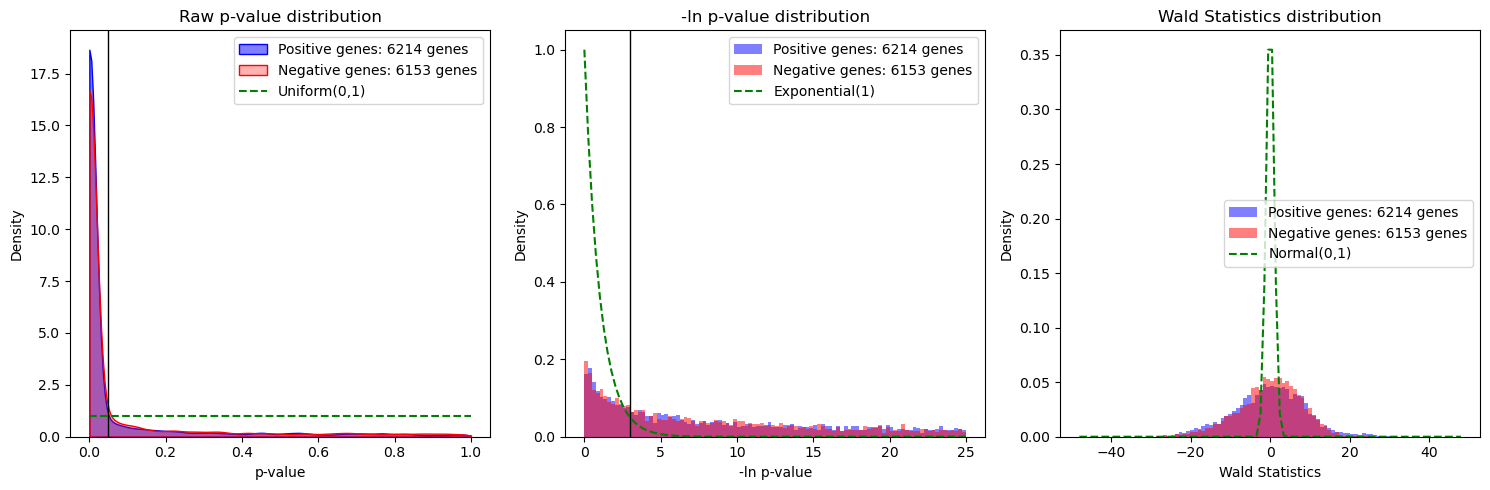

In [173]:
### Plotting distribution of p-values or stats for positive and negative genes (based on ground truth)
def plot_distribution_positives_negatives(values, cancer_id):
    positive_pvalues, negative_pvalues, positive_stats, negative_stats = values
    max_x = min(max(-np.log10(positive_pvalues).min(), -np.log10(negative_pvalues).min()),100) # avoid infinity from pvalue=0
    max_x_ln = min(max(-np.log(positive_pvalues).min(), -np.log(negative_pvalues).min()),100) # avoid infinity from pvalue=0
    max_x_stat = max(max(abs(positive_stats)), max(abs(negative_stats)))
    print(f"Positive genes: {len(positive_pvalues)}, Negative genes: {len(negative_pvalues)}, max_x: {max_x}, max_x_ln: {max_x_ln}, max_x_stat: {max_x_stat}")
    
    # Get PDF of uniform, exponential(1), exponential(ln10), normal(0,1)
    uniform_x = np.linspace(0, 1, 100)
    uniform_pdf = np.ones_like(uniform_x)
    exp1_x = np.linspace(0, max_x/4, 100)
    exp1_pdf = stats.expon.pdf(exp1_x, scale=1)
    expln10_x = np.linspace(0, max_x_ln/4, 100)
    expln10_pdf = stats.expon.pdf(expln10_x, scale=1/np.log(10))
    normal_x = np.linspace(-max_x_stat, max_x_stat, 100)
    normal_pdf = stats.norm.pdf(normal_x, loc=0, scale=1)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
    # Plot histogram of raw p-values, colored by positive and negative genes
    sns.kdeplot(positive_pvalues, fill=True, bw_adjust=0.5, clip=(0, 1), label=f'Positive genes: {len(positive_pvalues)} genes', color='blue', alpha=0.5, ax=ax1)
    sns.kdeplot(negative_pvalues, fill=True, bw_adjust=0.5, clip=(0, 1), label=f'Negative genes: {len(negative_pvalues)} genes', color='red', alpha=0.3, ax=ax1)
    ax1.axvline(0.05, color='black', linestyle='-', linewidth=1)
    ax1.plot(uniform_x, uniform_pdf, label='Uniform(0,1)', color='green',linestyle='dashed')
    ax1.set_xlabel('p-value')
    ax1.set_ylabel('Density')
    ax1.set_title(f'Raw p-value distribution')
    ax1.legend()
    # plt.savefig(f"plots_clear_pub/raw_pvalue_pos_neg_{cancer_id}.png")
    # plt.close()
    
    # Plot histogram of (-ln p-values), colored by positive and negative genes
    ax2.hist(-np.log(positive_pvalues), density=True, bins=100, range=(0, max_x_ln/4), alpha=0.5, label=f'Positive genes: {len(positive_pvalues)} genes', color='blue')
    ax2.hist(-np.log(negative_pvalues), density=True, bins=100, range=(0, max_x_ln/4), alpha=0.5, label=f'Negative genes: {len(negative_pvalues)} genes', color='red')
    ax2.axvline(-np.log(0.05), color='black', linestyle='-', linewidth=1)
    ax2.plot(exp1_x, exp1_pdf, label='Exponential(1)', color='green',linestyle='dashed')
    ax2.set_xlabel('-ln p-value')
    ax2.set_ylabel('Density')
    ax2.set_title(f'-ln p-value distribution')
    ax2.legend()
    # plt.savefig(f"plots_clear_pub/ln_pvalue_pos_neg_{cancer_id}.png")
    # plt.close()
    
    # # Plot histogram of (-log10 p-values), colored by positive and negative genes
    # plt.figure()
    # plt.hist(-np.log10(positive_pvalues), density=True, bins=50, range=(0, max_x/4), alpha=0.5, label=f'Positive genes: {len(positive_pvalues)} genes', color='blue')
    # plt.hist(-np.log10(negative_pvalues), density=True, bins=50, range=(0, max_x/4), alpha=0.5, label=f'Negative genes: {len(negative_pvalues)} genes', color='red')
    # plt.axvline(-np.log10(0.05), color='black', linestyle='-', linewidth=1)
    # plt.plot(expln10_x, expln10_pdf, label='Exponential(ln10)', color='orange',linestyle='dashed')
    # plt.xlabel('(-log10 P-value)')
    # plt.ylabel('Frequency')
    # plt.title(f'-log10 P-value distribution of positive and negative genes in {cancer_id}')
    # plt.legend()
    # plt.savefig(f"plots_clear_pub/log10_pvalue_pos_neg_{cancer_id}.png")
    # plt.close()
    
    
    # Plot histogram of (stat), colored by positive and negative genes
    # plt.hist(abs(positive_stats), density=True, bins=50, range=(0, max_x_stat), alpha=0.5, label=f'Positive genes: {len(positive_stats)} genes', color='blue')
    # plt.hist(abs(negative_stats), density=True, bins=50, range=(0, max_x_stat), alpha=0.5, label=f'Negative genes: {len(negative_stats)} genes', color='red')
    ax3.hist(positive_stats, density=True, bins=100, range=(-max_x_stat, max_x_stat), alpha=0.5, label=f'Positive genes: {len(positive_stats)} genes', color='blue')
    ax3.hist(negative_stats, density=True, bins=100, range=(-max_x_stat, max_x_stat), alpha=0.5, label=f'Negative genes: {len(negative_stats)} genes', color='red')
    ax3.plot(normal_x, normal_pdf, label='Normal(0,1)', color='green',linestyle='dashed')
    ax3.set_xlabel('Wald Statistics')
    ax3.set_ylabel('Density')
    ax3.set_title(f'Wald Statistics distribution')
    ax3.legend()
    # plt.savefig(f"plots_clear_pub/stat_pos_neg_{cancer_id}.png")
    # plt.close()
    plt.tight_layout()
    plt.savefig(f"plots_clear_pub/distribution_pos_neg_{cancer_id}.png")
    plt.show()
plot_distribution_positives_negatives(values, "BRCA")